## EDA and Preprocessing

#### 1. Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

In [3]:
# Load data
df = pd.read_csv('Employee.csv')

In [7]:
# Basic exploration
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (148, 6)


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [8]:
# Unique values in each feature
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {len(df[col].unique())} unique values")


Unique values in each column:
Company: 7 unique values
Age: 30 unique values
Salary: 41 unique values
Place: 12 unique values
Country: 1 unique values
Gender: 2 unique values


In [9]:
# Statistical analysis
df.describe(include='all')


,Company,Age,Salary,Place,Country,Gender
count,140,130.000000,124.000000,134,148,148.000000
unique,6,NaN,NaN,11,1,NaN
top,TCS,NaN,NaN,Mumbai,India,NaN
freq,53,NaN,NaN,37,148,NaN
mean,NaN,30.484615,5312.467742,NaN,NaN,0.222973
std,NaN,11.096640,2573.764683,NaN,NaN,0.417654
min,NaN,0.000000,1089.000000,NaN,NaN,0.000000
25%,NaN,22.000000,3030.000000,NaN,NaN,0.000000
50%,NaN,32.500000,5000.000000,NaN,NaN,0.000000
75%,NaN,37.750000,8000.000000,NaN,NaN,0.000000


In [10]:
# Rename columns for consistency
df = df.rename(columns={
    'Place': 'City',
    'Country': 'Country'
})

In [11]:
df

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


#### 2. Data Cleaning

In [12]:
# Check for missing values
df.isna().sum()

Company     8
Age        18
Salary     24
City       14
Country     0
Gender      0
dtype: int64

In [13]:
# Remove duplicate rows
df = df.drop_duplicates()

In [14]:
df

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [16]:
# Replace 0 in Age with NaN
df['Age'] = df['Age'].replace(0, np.nan)


In [17]:
df

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [18]:
# Treat missing values
# For numerical columns: fill with median
num_cols = ['Age', 'Salary']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


In [20]:
# For categorical columns: fill with mode
cat_cols = ['Company', 'City', 'Country', 'Gender']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [21]:
# Handle outliers in Salary using IQR
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]

print("\nMissing values after cleaning:")
print(df.isna().sum())


Missing values after cleaning:
Company    0
Age        0
Salary     0
City       0
Country    0
Gender     0
dtype: int64


#### 3.Data Analysis

In [22]:
# Filter data
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
print("\nEmployees with age >40 and salary<5000:")
print(filtered_df)


Employees with age >40 and salary<5000:
     Company   Age  Salary       City Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


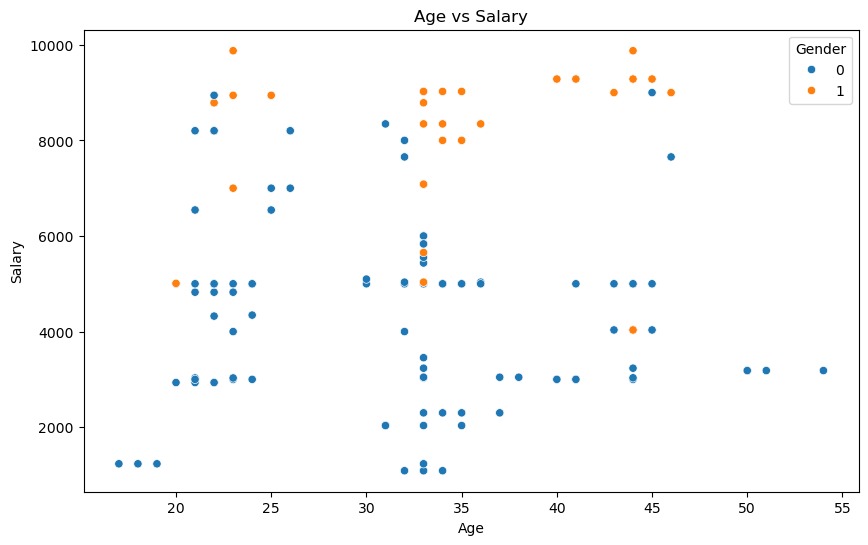

In [23]:
# Plot age vs salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Salary', hue='Gender')
plt.title('Age vs Salary')
plt.savefig('age_vs_salary.png')
plt.show()

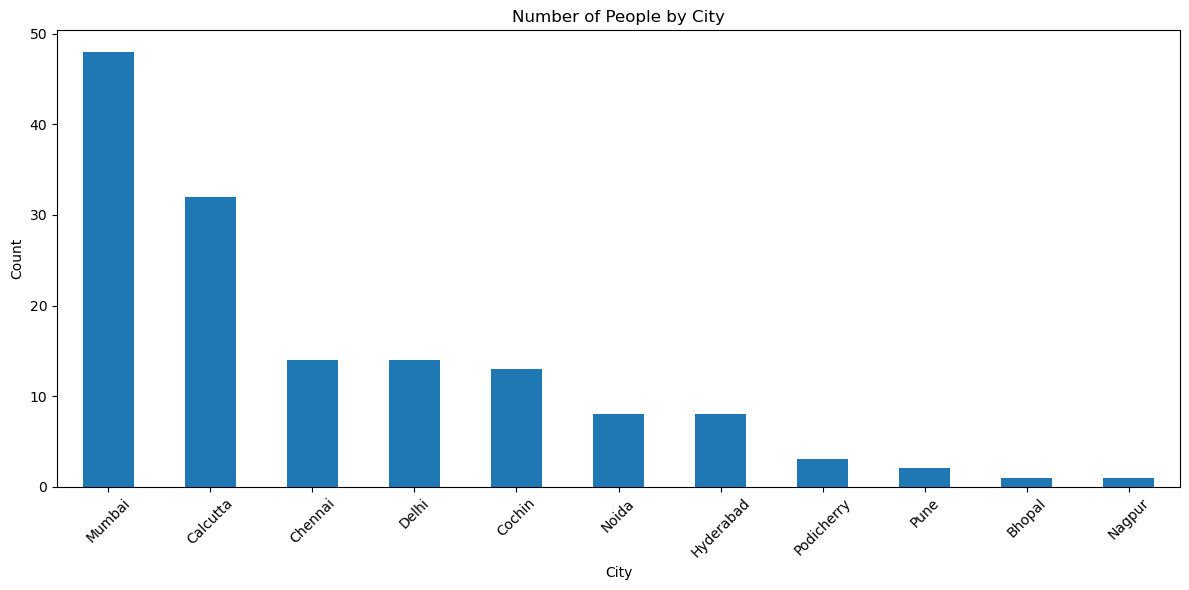

In [24]:
# Count people by city
city_counts = df['City'].value_counts()
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar')
plt.title('Number of People by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('people_by_city.png')
plt.show()

#### 4. Data Encoding

In [25]:
# Label Encoding for binary categorical variable (Gender)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [26]:
# One-Hot Encoding for other categorical variables
categorical_cols = ['Company', 'City', 'Country']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [27]:
print("\nData after encoding:")
print(df_encoded.head())


Data after encoding:
    Age  Salary  Gender  Company_Congnizant  Company_Infosys  \
0  20.0  5000.0       0               False            False   
1  30.0  5000.0       0               False             True   
2  35.0  2300.0       0               False            False   
3  40.0  3000.0       0               False             True   
4  23.0  4000.0       0               False            False   

   Company_Infosys Pvt Lmt  Company_TCS  Company_Tata Consultancy Services  \
0                    False         True                              False   
1                    False        False                              False   
2                    False         True                              False   
3                    False        False                              False   
4                    False         True                              False   

   City_Calcutta  City_Chennai  City_Cochin  City_Delhi  City_Hyderabad  \
0          False          True        False      

#### 5. Feature Scaling

In [28]:
# Select numerical features to scale
numerical_features = ['Age', 'Salary']

In [29]:
# Standard Scaling
standard_scaler = StandardScaler()
df_standard = df_encoded.copy()
df_standard[numerical_features] = standard_scaler.fit_transform(df_standard[numerical_features])

In [30]:
# MinMax Scaling
minmax_scaler = MinMaxScaler()
df_minmax = df_encoded.copy()
df_minmax[numerical_features] = minmax_scaler.fit_transform(df_minmax[numerical_features])


In [31]:
print("\nData after Standard Scaling:")
print(df_standard.head())



Data after Standard Scaling:
        Age    Salary  Gender  Company_Congnizant  Company_Infosys  \
0 -1.484676 -0.100827       0               False            False   
1 -0.267174 -0.100827       0               False             True   
2  0.341577 -1.243735       0               False            False   
3  0.950328 -0.947426       0               False             True   
4 -1.119426 -0.524127       0               False            False   

   Company_Infosys Pvt Lmt  Company_TCS  Company_Tata Consultancy Services  \
0                    False         True                              False   
1                    False        False                              False   
2                    False         True                              False   
3                    False        False                              False   
4                    False         True                              False   

   City_Calcutta  City_Chennai  City_Cochin  City_Delhi  City_Hyderabad  \
0    

In [32]:
print("\nData after MinMax Scaling:")
print(df_minmax.head())


Data after MinMax Scaling:
        Age    Salary  Gender  Company_Congnizant  Company_Infosys  \
0  0.081081  0.445089       0               False            False   
1  0.351351  0.445089       0               False             True   
2  0.486486  0.137817       0               False            False   
3  0.621622  0.217480       0               False             True   
4  0.162162  0.331285       0               False            False   

   Company_Infosys Pvt Lmt  Company_TCS  Company_Tata Consultancy Services  \
0                    False         True                              False   
1                    False        False                              False   
2                    False         True                              False   
3                    False        False                              False   
4                    False         True                              False   

   City_Calcutta  City_Chennai  City_Cochin  City_Delhi  City_Hyderabad  \
0      